# 恒温无限大板中的热扩散

## 问题
假设板的初始温度$T=0$,当时间 $t>= 0$ 时，板的左侧面收到高温$T=1.0$，板长为100。设$\alpha =0.25$，计算$t=200$时，板中的温度分布，并比较LBM和FDM两种方法的结果。

## LBM

In [17]:
# LBM Code for 1-D, diffusion problem, D1Q2

import numpy as np
import matplotlib.pyplot as pl
% matplotlib inline

m = 100    # m is the number of lattice nodes

f1 = np.zeros(m+1,dtype=float)
f2 = np.zeros(m+1,dtype=float)
rho = np.zeros(m+1,dtype=float)
feq = np.zeros(m+1,dtype=float)
x = np.zeros(m+1,dtype=float)

dt = 1.0
dx = 1.0
x[0] = 0.0

for i in range(1,m+1):
    x[i] = x[i-1] + dx

csq = dx*dx/(dt*dt)
alpha = 0.25
omega = 1.0/(alpha/(dt*csq)+0.5)
mstep = 200    # The total number of time steps
twall = 1.0    # Left hand wall temperature

# Initial condition
for i in range(0,m+1):
    rho[i] = 0.0    # Initial value of the domain temperature
    f1[i] = 0.5 * rho[i]
    f2[i] = 0.5 * rho[i]

# main loop
for kk in range(1,mstep+1):
    # collision process:
    for i in range(0,m+1):
        rho[i] = f1[i] + f2[i]
        feq[i] = 0.5 * rho[i]
        
        # since k1 = k2 =0.5, then feq1 = feq2 = feq
        f1[i] = (1.0 - omega)*f1[i] + omega*feq[i]
        f2[i] = (1.0 - omega)*f2[i] + omega*feq[i]
    
    # streaming process:
    for i in range(1,m):
        f1[m-i] = f1[m-i-1]    # f1 streaming
        f2[i-1] = f2[i]    # f2 streaming
        
    # Boundary condition
    f1[0] = twall - f2[0]    # constant temperature boundary condition, x = 0
    f1[m] = f1[m-1]    # adiabatic(绝热的)  boundary condition, x = L
    f2[m] = f2[m-1]    # adiabatic boundary condition, x = L
    
# end of the main loop

#for i in range(0,m+1):
#    print(x[i]," ",rho[i])

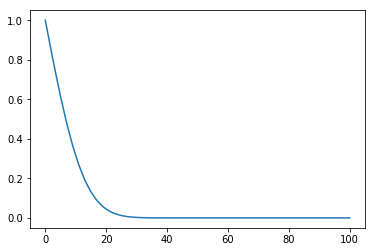

In [18]:
pl.plot(x,rho)

## FDM

显示格式的差分方程为Eqs. 3.8，如下所示
$$T_i^{n+1} = T_i^n + \frac{\alpha \Delta t}{\Delta x^2}(T_{i+1}^n - 2 T_i^n + T_{i-1}^n)$$

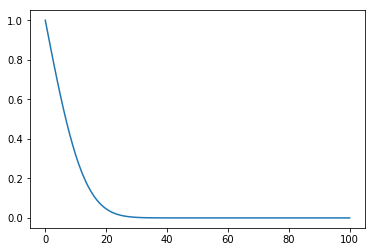

In [11]:
# Finite Difference Code for 1-D diffusion problems

import numpy as np
import matplotlib.pyplot as pl
% matplotlib inline

m = 100    # m is the number of lattice nodes
fo = np.zeros(m+1,dtype=float)
f = np.zeros(m+1,dtype=float)

dx = 1.0
dt = 0.5
alpha = 0.25
mstep = 400
    
fo[0] = 1.0    # initial condition for old value of f at x=0
f[0] = 1.0    # initial condition for updated value of f at x=0
fo[m] = fo[m-1]    # initial condition for old value of f at x=L
f[m] = f[m-1]    # initial condition for uodated value of f at x=L

for kk in range(1,mstep+1):
    # main loop
    for i in range(1,m):
        f[i] = fo[i] + dt*alpha*(fo[i+1]-2.0*fo[i]+fo[i-1])/(dx*dx)    # Eqs. 3.8
    
    for i in range(1,m):
        fo[i] = f[i]    # updating
    
    fo[m] = f[m-1]    # updating the boundary condition at x=L
    # end of the main loop
    
x_fdm  = np.zeros(m+1,dtype=float)

for i in range(0,m+1):
    # print(x_fdm[i]," ",f[i])
    if i < m:
        x_fdm[i+1] = x_fdm[i] + dx
        
pl.plot(x_fdm,f)

## 结果对比

<function matplotlib.pyplot.show>

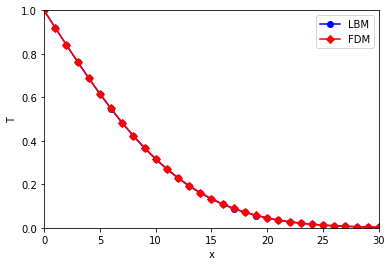

In [24]:
pl.plot(x,rho,'bo-',label='LBM')
pl.plot(x_fdm,f,'rD-',label='FDM')
pl.xlabel('x')  
pl.ylabel('T') 
pl.legend()
pl.xlim(0,30)
pl.ylim(0,1)
pl.show 